```
Nama          : Roikhatul Miskiyah
Kode Peserta  : PYTN-KS05-010
Batch         : 5
```

**Assigment Python 1**


**Outline:**
```
A. Area Plot (a)
B. Histogram (a)
C. Bar Chart (a)
D. Pie Chart (a)
E. Box Plot  (a)
F. Scatter Plot (a)
G. Word Clouds
H. Folium Maps
I. Overall Analysis

*for each plot (A - F):
- Question/what data we want to visualize
- Pre-processing if needed
- (a)or analysis :: Conclusion / Kesimpulan
```

In [1]:
# Eksplorasi Dataset
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from timeit import default_timer
import folium
mpl.style.use(['ggplot'])
%matplotlib inline

In [2]:
df_lc = pd.read_csv('london_crime_by_lsoa.csv')
df_lc.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [3]:
# print the dimensions of the dataframe
print(df_lc.shape)

(13490604, 7)


In [4]:
df_lc.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [5]:
df_lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [6]:
df_lc.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

---
# A. Area Plot

**Question** : 
1. Kejahatan apa yang memiliki kasus tertinggi di London dan wilayah mana saja?

**Pre-processing if needed** // *Student melakukan preproses dataset sebelum menerapkan visualisasi*

In [7]:
# 1. Pre-processing data
#Mengelompokkan data pada major_category untuk mengetahui jumlah kasus yang paling banyak terjadi
df_lc.groupby('major_category').value.sum().sort_values(ascending=False)

major_category
Theft and Handling             2661861
Violence Against the Person    1558081
Burglary                        754293
Criminal Damage                 630938
Drugs                           470765
Robbery                         258873
Other Notifiable Offences       106349
Fraud or Forgery                  5325
Sexual Offences                   1273
Name: value, dtype: int64

In [8]:
df_TaH = df_lc[df_lc.major_category == 'Theft and Handling']
df_TaH

,lsoa_code,borough,major_category,minor_category,value,year,month
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
10,E01001985,Haringey,Theft and Handling,Motor Vehicle Interference & Tampering,0,2013,12
14,E01002398,Hillingdon,Theft and Handling,Theft/Taking Of Motor Vehicle,0,2016,2
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
...,...,...,...,...,...,...,...
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
13490593,E01004531,Wandsworth,Theft and Handling,Handling Stolen Goods,0,2014,12
13490596,E01000655,Bromley,Theft and Handling,Theft From Shops,0,2010,7
13490597,E01000588,Brent,Theft and Handling,Theft/Taking of Pedal Cycle,0,2014,10


In [9]:
# Mencari 2 wilayah yang memiliki kasus Theft and Handling
df_w2 = df_TaH.groupby('borough').value.sum().sort_values(ascending=False)
df_w2.head()

borough
Westminster    277617
Camden         140596
Lambeth        114899
Southwark      109432
Islington      107661
Name: value, dtype: int64

In [10]:
# Setelah mengetahui 2 wilayah yang memiliki kasus tertinggi, selanjutnya jumlahkan total kasus berdasarkan wilayah dan tahunnya
df_TaH_west = df_TaH[df_TaH.borough == 'Westminster'].groupby('year').value.sum()
df_TaH_cam = df_TaH[df_TaH.borough == 'Camden'].groupby('year').value.sum()

In [11]:
print(df_TaH_west)
print(df_TaH_cam)

year
2008    29266
2009    29967
2010    29191
2011    33529
2012    38152
2013    33868
2014    28144
2015    27980
2016    27520
Name: value, dtype: int64
year
2008    14394
2009    15537
2010    16425
2011    18573
2012    17717
2013    15767
2014    13640
2015    14455
2016    14088
Name: value, dtype: int64


In [12]:
# Menggabungkan kedua data tersebut kedalam satu dataframe
comb1 = {'Westminster' : df_TaH_west,
         'Camden' : df_TaH_cam
}
df_comb1 = pd.DataFrame(comb1)
df_comb1

,Westminster,Camden
year,,
2008,29266,14394
2009,29967,15537
2010,29191,16425
2011,33529,18573
2012,38152,17717
2013,33868,15767
2014,28144,13640
2015,27980,14455
2016,27520,14088


**Create data visualization** // *Mengimplementasikan area plot menggunakan matplotlib dengan data yang relevan dan sesuai dengan kegunaan plot/grafik*

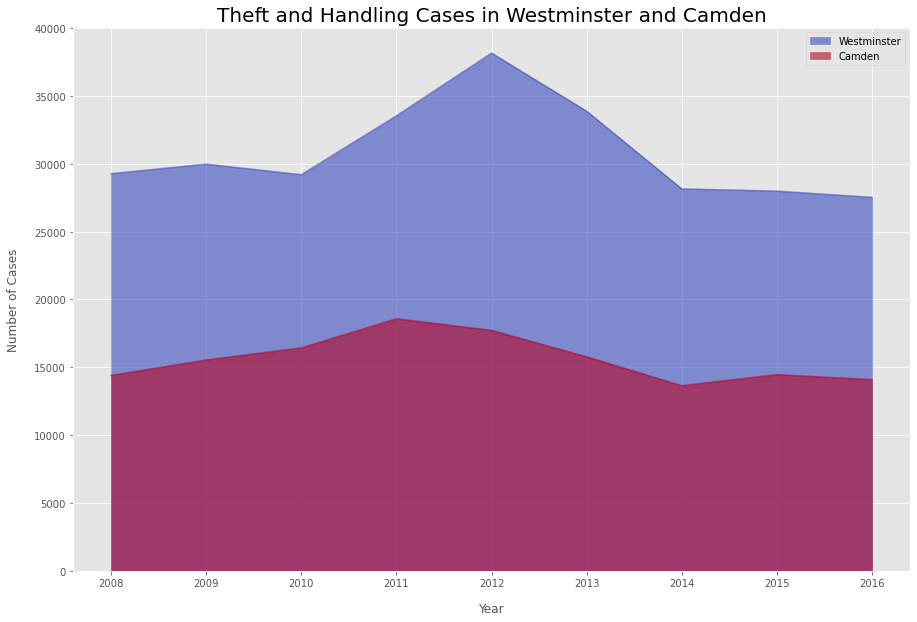

In [13]:
# 2. Create visualization
df_comb1.plot(kind='area', figsize=(15,10), stacked = False, alpha = 0.6, colormap="coolwarm")
plt.title('Theft and Handling Cases in Westminster and Camden', fontsize = 20)
plt.xlabel('Year', fontsize=12, labelpad=14)
plt.ylabel('Number of Cases', fontsize=12, labelpad=14)

plt.legend()
plt.show()

**Conclusion** // *Menarik informasi/kesimpulan berdasarkan area plot yang telah student buat*



1. Berdasarkan hasil pre-processing dan visualisasi data, maka dapat ditarik kesimpulan bahwa kasus kejahatan tertinggi di London adalah kejahatan "Theft and Handling". Adapun beberapa wilayah yang memiliki kasus kejahatan tertinggi yaitu Westminster dan Camden. Puncak kasus tertinggi kejahatan "Theft and Handling" berada di wilayah Westminster pada tahun 2012 dengan jumlah kasus > 400.

---
# B. Histogram

**Question:**
1. Bagaimana distribusi persebaran kasus kriminal di London pada tahun 2015?

**Pre-Processing**

In [14]:
# 1. Pre-processing if needed
df_hist2015 = df_lc[df_lc.year == 2015].groupby('borough').value.sum()
df_hist2015.head()

borough
Barking and Dagenham    16346
Barnet                  24036
Bexley                  11990
Brent                   24883
Bromley                 20637
Name: value, dtype: int64

In [15]:
np.histogram(df_hist2015)

(array([ 1,  0,  6,  3, 10,  8,  4,  0,  0,  1], dtype=int64),
 array([  151. ,  4875.4,  9599.8, 14324.2, 19048.6, 23773. , 28497.4,
        33221.8, 37946.2, 42670.6, 47395. ]))

**Create Visualization**

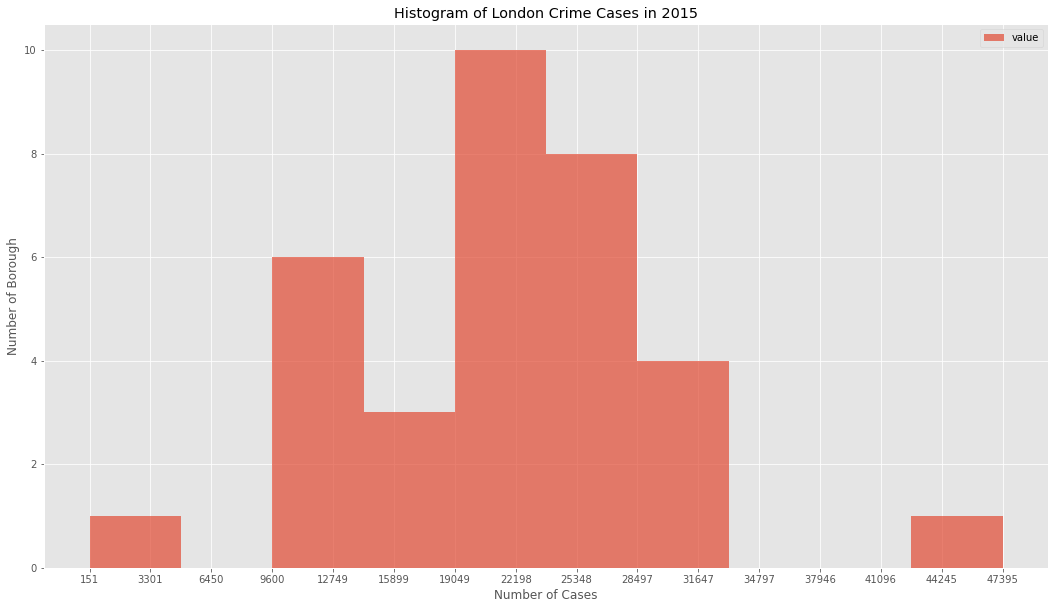

In [53]:
# 2. Create visualization
count, bin_edges = np.histogram(df_hist2015, 15)

df_hist2015.plot(kind='hist',
                 figsize=(18, 10),
                 bins=10,
                 alpha=0.7,
                 xticks=bin_edges,
                 )

plt.title('Histogram of London Crime Cases in 2015')
plt.ylabel('Number of Borough')
plt.xlabel('Number of Cases')
plt.legend()
plt.show()


**Conclusion**

1. Berdasarkan hasil visualisasi data dengan histogram, pada tahun 2015 terdapat 10 wilayah dengan jumlah kasus kriminal yaitu berkisar antara 19049 hingga 23773 kasus. Selanjutnya, kasus criminal terkecil berkisar antara 151 hingga 4876 dan antara 42670 hingga 47395 kasus pada 2 wilayah. Selanjutnya kasus terbanyak ada pada 1 wilayah yakni berkisar antara 9600 sampai dengan 33222 kasus.

---
# C. Bar Chart


**Question:**
1. Bagaimana perbandingan jumlah kasus kriminal "Drugs" di London setiap tahunnya?

**Pre-Processing**

In [17]:
# 1. Pre-processing if needed
df_bar_drugs = df_lc[df_lc.major_category == 'Drugs'].groupby('year').value.sum()
df_bar_drugs.head()

year
2008    68804
2009    60549
2010    58674
2011    57550
2012    51776
Name: value, dtype: int64

**Create Visualization**

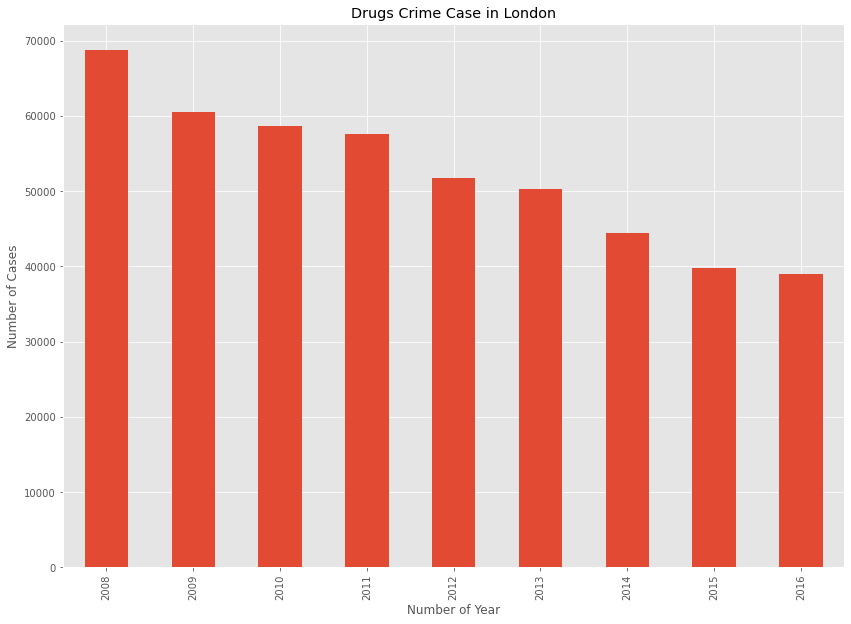

In [54]:
# 2. Create visualization
df_bar_drugs.plot(kind='bar', figsize=(14, 10))

plt.xlabel('Number of Year') 
plt.ylabel('Number of Cases') 
plt.title('Drugs Crime Case in London')

plt.show()

**Conclusion**

1. Pada plot bar chart di atas menunjukkan bahwa total kasus kriminal narkoba mengalami penurunan dari setiap tahunnya hingga tahun 2016. Dan kasus narkoba tertinggi terjadi pada tahun 2008 dengan jumlah mencapai sekita 70000 kasus. 

---
# D. Pie Chart

**Question**
1. Bagaimana presentase jumlah value kasus kriminal di London dari tahun 2008 hingga 2016 menggunakan pie chart?

**Pre-Processing**

In [19]:
# 1. Pre-processing if needed
df_maj = df_lc.groupby('major_category', axis=0).sum().sort_values(by=['value'], ascending=False)
df_maj

,value,year,month
major_category,,,
Theft and Handling,2661861,7980195600,25780950
Violence Against the Person,1558081,6381548928,20616336
Burglary,754293,2099731248,6783426
Criminal Damage,630938,4163174064,13449618
Drugs,470765,2373089616,7666542
Robbery,258873,1890040608,6105996
Other Notifiable Offences,106349,1561923648,5045976
Fraud or Forgery,5325,475878240,1537380
Sexual Offences,1273,217513296,702702


**Create Visualization**

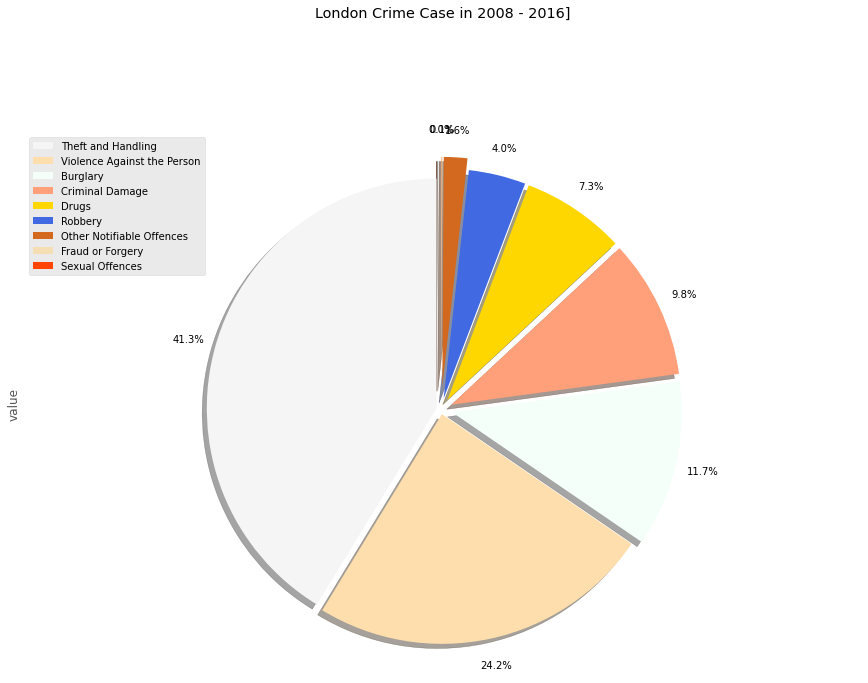

In [20]:
# 2. Create visualization
import random as rd
import matplotlib.colors as mc

colors = rd.choices(list(mc.CSS4_COLORS.values()), k=11)
explode_list = [0.02, 0.02, 0.05, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1]

df_maj['value'].plot(kind='pie',
                                figsize=(15, 10),
                                autopct='%1.1f%%',
                                startangle=90,
                                shadow=True,
                                labels=None, 
                                pctdistance=1.12,
                                colors=colors,  
                                explode=explode_list  
                                )

plt.title('London Crime Case in 2008 - 2016]', y=1.2)
plt.axis('equal')

plt.legend (labels=df_maj.index, loc='upper left')
plt.show()

**Conclusion**
1. Berdasarkan pie chart di atas kasus kriminal paling banyak yang terjadi di London adalah Theft and Handling dengan jumlah presentase value sebesar 41.3% kemudian kasus Violence Against the Person sebesar 24.2%, Burglary 11.7%, Criminal Damage 9.8%, Drugs 7.3%, Robbery 4.0%, dan seterusnya. 

---
# E. Box Plot

**Question:**
1. Bagaimana distribusi kasus kriminal jenis burglary  di London menggunakan box plot?

**Pre-Processing**

In [21]:
# 1. Pre-processing if needed
df_box_bulg = df_lc[df_lc.major_category == 'Burglary'].groupby('year').value.sum().transpose()
df_box_bulg.head()

year
2008    88092
2009    90619
2010    86826
2011    93315
2012    93392
Name: value, dtype: int64

In [22]:
df_box_bulg.describe()

count        9.000000
mean     83810.333333
std       9658.166674
min      68285.000000
25%      76053.000000
50%      87222.000000
75%      90619.000000
max      93392.000000
Name: value, dtype: float64

**Create Visualization**

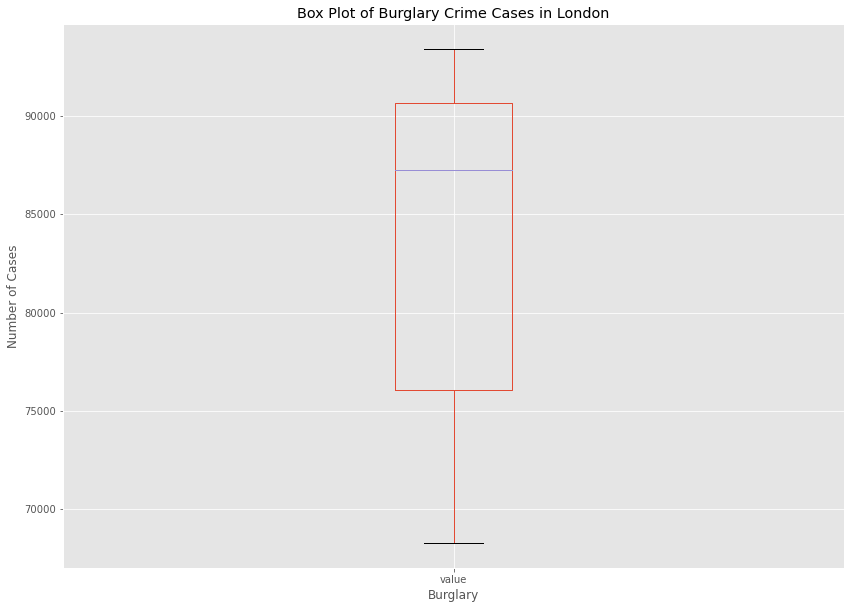

In [55]:
# 2. Create visualization
df_box_bulg.plot(kind='box', figsize=(14, 10))

plt.title('Box Plot of Burglary Crime Cases in London')
plt.xlabel('Burglary')
plt.ylabel('Number of Cases')

plt.show()

**Conclusion**

1. Dari box plot diatas menunjukkan beberapa informasi yakni, jumlah kasus burglary paling rendah dengan jumlah sekitar 62500 kasus (min), jumlahah tertinggi sekitar 100000 kasus (max), dan jumlah median sekitar 87500 kasus (median). Presentase 25% dari kasus Burglary di London terhitung dari ~76000 atau lebih sedikit (Kuartil pertama). Dan presentase 75% untuk kasus Burglary di London terhitung dari ~91000 atau lebih sedikit (Kuartil Ketiga).

---
# F. Scatter Plot

**Question:**
1. Bagaimana visualisasi total kasus Violence Against the Person untuk periode tahun 2008 hingga 2016?

**Pre-Processing**

In [24]:
# 1. Pre-processing if needed
df_VAP = df_lc[df_lc.major_category == 'Violence Against the Person'].groupby('year').value.sum()
VAP = {'Violence Against the Person': df_VAP}
df_VAP = pd.DataFrame(VAP)
df_VAP.reset_index(inplace=True)
df_VAP

,year,Violence Against the Person
0,2008,159844
1,2009,160777
2,2010,157894
3,2011,146901
4,2012,150014
5,2013,146181
6,2014,185349
7,2015,218740
8,2016,232381


**Create Visualization**

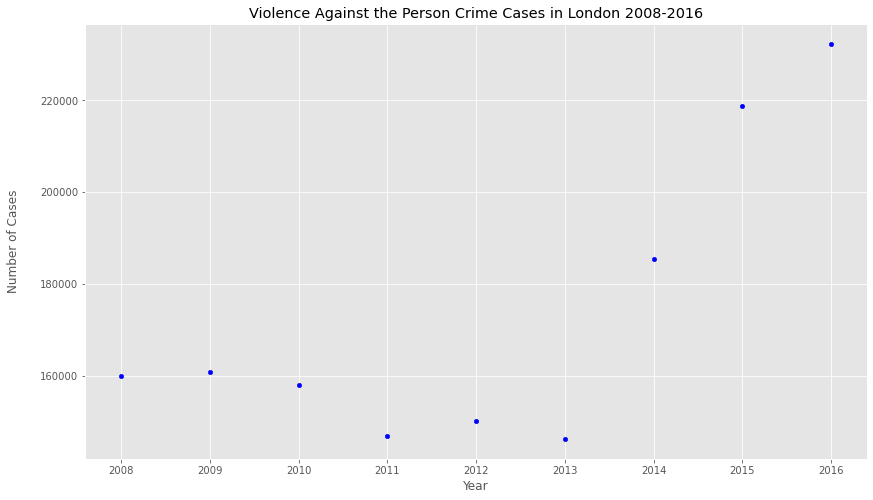

In [49]:
# 2. Create visualization
df_VAP.plot(kind='scatter', 
            x='year', 
            y='Violence Against the Person',
            color='blue',
            figsize=(14,8))

# Graded-Funtion End
plt.title("Violence Against the Person Crime Cases in London 2008-2016")
plt.xlabel('Year')
plt.ylabel('Number of Cases', labelpad=20)

plt.show()

**Conclusion**

1. Pada gambar scatter plot di atas menunjukkan bahwa sempat terjadi penurunan kasus dari kejahatan Violence Against the Person dari tahun 2010. Kemudian terjadi peningkatan kasus yang cukup siginifikan pada tahun 2014 hingga 2016 dengan jumlah mencapai sekitar 240000 kasus di London. 

# G. Word Clouds

**Create Visualization**

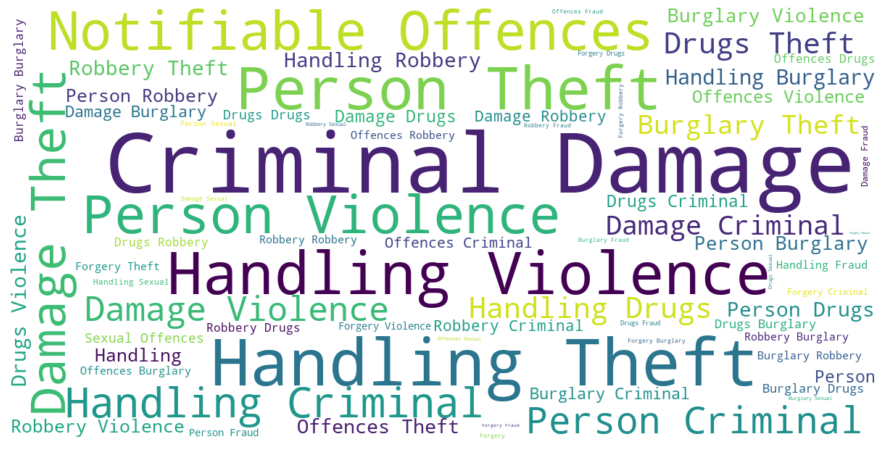

In [26]:
# 1. Create visualization

stopwords = set(STOPWORDS)
crime_wc = WordCloud(width=1200, height=600, background_color='white', stopwords=stopwords, random_state=1)
crime_wc.generate(' '.join(df_lc.major_category))

fig = plt.figure(figsize=(16, 8))

plt.imshow(crime_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# H. Folium Maps

**Create Visualization**

In [32]:
# 1. pre-processing if needed
# London latitude dan longitude values
latitude = 51.5092811
longitude = -0.1318053

# create map and display it
london_map = folium.Map(location=[latitude, longitude], zoom_start=18)
london_map

# I. Overall Analysis

Analisis Keseluruhan
1. Area Plot, dalam penggunaan visualisasi menggunakan area plot. Kita dapat mengetahui kasus kejahatan tertinggi di London, yakni kejahatan "Theft and Handling". Dan wilayah di London yang memiliki kasus kejahatan tertinggi adalah Westminster dan Camden. Puncak kasus tertinggi kejahatan "Theft and Handling" berada di wilayah Westminster pada tahun 2012 dengan jumlah kasus > 400.
2. Histogram, dalam penggunaan visualisasi menggunakan histogram. Kita dapat mengetahui bahwa pada tahun 2015 terdapat 10 wilayah dengan jumlah kasus kriminal yaitu berkisar antara 19049 hingga 23773 kasus. Selanjutnya, kasus criminal terkecil berkisar antara 151 hingga 4876 dan antara 42670 hingga 47395 kasus pada 2 wilayah. Selanjutnya kasus terbanyak ada pada 1 wilayah yakni berkisar antara 9600 sampai dengan 33222 kasus.
3. Bar Chart, dalam penggunaan visualisasi menggunakan bar chart. Kita dapat mengetahui total kasus kriminal narkoba mengalami penurunan dari setiap tahunnya hingga tahun 2016. Dan kasus narkoba tertinggi terjadi pada tahun 2008 dengan jumlah mencapai sekita 70000 kasus. 
4. Pie Chart, dalam penggunaan visualisasi menggunakan pie chart. Kita dapat mengetahui bahwa kasus kriminal paling banyak yang terjadi di London adalah Theft and Handling dengan jumlah presentase value sebesar 41.3% kemudian kasus Violence Against the Person sebesar 24.2%, Burglary 11.7%, Criminal Damage 9.8%, Drugs 7.3%, Robbery 4.0%, dan seterusnya. 
5. Box Plot, dalam penggunaan visualisasi menggunakan box chart. Kita dapat mengetahui jumlah kasus burglary paling rendah dengan jumlah sekitar 62500 kasus (min), jumlahah tertinggi sekitar 100000 kasus (max), dan jumlah median sekitar 87500 kasus (median). Presentase 25% dari kasus Burglary di London terhitung dari ~76000 atau lebih sedikit (Kuartil pertama). Dan presentase 75% untuk kasus Burglary di London terhitung dari ~91000 atau lebih sedikit (Kuartil Ketiga).
6. Scatter Plot, dalam penggunaan visualisasi menggunakan scatter plot. Kita dapat mengetahui bahwa sempat terjadi penurunan kasus dari kejahatan Violence Against the Person dari tahun 2010. Kemudian terjadi peningkatan kasus yang cukup siginifikan pada tahun 2014 hingga 2016 dengan jumlah mencapai sekitar 240000 kasus di London. 
7. Word Clouds, dalam penggunaan visualisasi menggunakan word clouds. Kita dapat melihat kata yang paling umum muncul dalam dataset adalah Criminal, Damage, Handling, Violence, Theft, Person, Notifiable, Offences dan lainnya. 
8. Folium Maps, dalam penggunaan visualisasi menggunakan folium maps. Kita dapat peta wilayah London menggunakan fungsi folium. 

                                                    -- Selesai --